In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
import math

In [2]:
## formula for inflection point line
def jmp_4pl(x, A, B, C, D):
    return (D + ((A-D) / (1 + math.exp((x - C)*B))))

# scatter plot with inflection curve
def plot_inflection_point(df, ax):
    x_values = df["minutes_after_infection"].to_list()
    y_values = np.log10(df["PFU_ml"].to_list())
    ax.scatter(x_values, y_values)
    # values for inflection point line
    A = 6.85 # minimum asymptote
    B = 0.044 # hill's slope, steepness
    C = 66.79 # inflection point
    D = 11.27 # maximum asymptote
    xs = np.linspace(min(x_values) + 0.00000001, max(x_values), 10000)
    ax.plot(xs, [jmp_4pl(x, A, B, C, D) for x in xs])
    ax.set_title("Inflection Point", pad=15, fontsize=15)
    ax.set_xlabel("Time After Infection [min]", fontsize=12)
    ax.set_ylabel("Log10(PFU/ml)", fontsize=12)
    ax.grid(color='#e1e4e8')    

In [3]:
# real time bar plot
def realtime_plot(df, ax):
    df = df.loc[df["time"] != 0, ["time", "norm data 7"]]
    df.plot.bar(x="time", y="norm data 7", ax=ax, legend=False)
    ax.set_yscale('log')
    ax.set_xlabel('Time [min]', fontsize=12)
    ax.set_ylabel('Relative Normalized MS2 Genomes', fontsize=12)
    ax.set_title("Real Time PCR", pad=15, fontsize=15)
    ax.xaxis.set_tick_params(rotation=0)
    

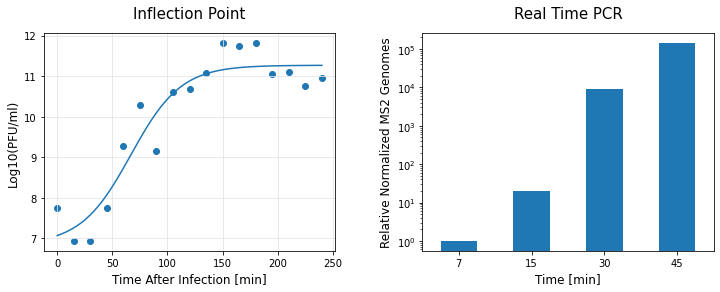

In [4]:
if __name__ == "__main__":
    inflection_input = r"/sternadi/home/volume2/noam/ms2/inflection_point/inflection_WT.xlsx"
    realtime_input = r"/sternadi/home/volume2/noam/ms2/ms2_real_time/qPCR.graph.xlsx"
    output_dir = r"/sternadi/home/volume3/arielle_k/for_adi/paper_2024"
    
    inf_df = pd.read_excel(inflection_input)
    rt_df = pd.read_excel(realtime_input)
    
    # plot data
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), facecolor="white", edgecolor="black")
    plot_inflection_point(inf_df, ax[0])
    realtime_plot(rt_df, ax[1])
    plt.subplots_adjust(wspace=0.3)
    out_path = os.path.join(output_dir, "inflection_and_rt.png")
    plt.savefig(out_path)
    plt.show()

